### Q-2
* What is the distribution of mental health treatment-seeking across different demographics (e.g., gender, country, occupation)? 

* Also, are there trends seen over time (based on Timestamp), such as increasing stress levels or changes in treatment-seeking behaviors?


#### Step 1: Data Preprocessing

In [1]:
# install.packages("tidyverse")
# install.packages("lubridate")
# install.packages("ggplot2")
# install.packages("dplyr")
# install.packages("caret")
# install.packages("forecast")
# install.packages("reshape2")

In [1]:
# Load required libraries
library(tidyverse)
library(lubridate)
library(ggplot2)
library(dplyr)
library(caret) # For logistic regression
library(forecast) # For time series models
library(reshape2) # For heatmap

Warning message:
"package 'tidyverse' was built under R version 4.4.2"
Warning message:
"package 'ggplot2' was built under R version 4.4.2"
Warning message:
"package 'dplyr' was built under R version 4.4.2"
Warning message:
"package 'lubridate' was built under R version 4.4.2"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'caret' was built under R version 4.4.2"
Loading required package: lattice


Attaching packa

### Importing a CSV File

In [2]:
library(readr)

# Replace "file_path.csv" with the path to your dataset
data <- read_csv("..//data//mental_health.csv")


Rows: 292364 Columns: 17
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (17): Timestamp, Gender, Country, Occupation, self_employed, family_hist...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(data)

Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
8/27/2014 11:29,Female,United States,Corporate,NA,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
8/27/2014 11:31,Female,United States,Corporate,NA,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
8/27/2014 11:32,Female,United States,Corporate,NA,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure


In [32]:
unique(data$Occupation)

[1] Corporate Student   Business  Homemaker Others   
Levels: Business Corporate Homemaker Others Student

#### Visulaizing missing data

In [5]:
install.packages("naniar")

Installing package into 'C:/Users/xperi/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'naniar' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\xperi\AppData\Local\Temp\RtmpyoQaPi\downloaded_packages


Warning message:
"package 'naniar' was built under R version 4.4.2"


ERROR: [1m[33mError[39m in `test_if_large_data()`:[22m
[1m[22m[33m![39m Data exceeds recommended size for visualisation
Consider downsampling your data with `dplyr::slice_sample()`
Or set argument, `warn_large_data` = `FALSE`


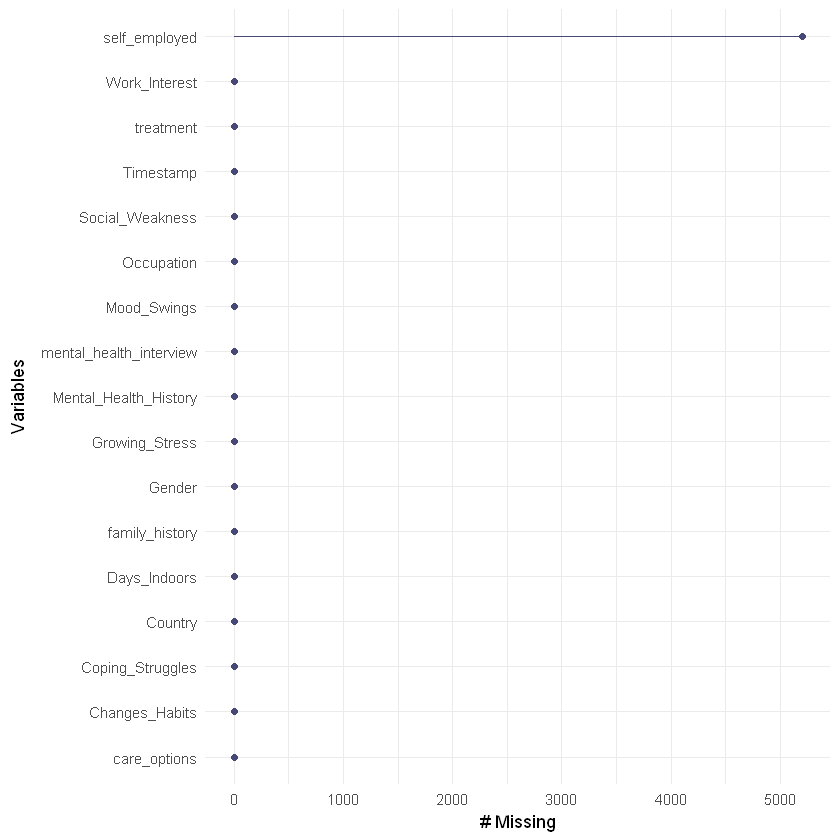

In [4]:
library(naniar)

# Visualize missingness
gg_miss_var(data)

# Heatmap of missing data
vis_miss(data)


#### Convert Timestamp into a Date Format

In [5]:
library(lubridate)

# Convert Timestamp to date-time format
data <- data %>%
  mutate(Timestamp = mdy_hm(Timestamp),                 # Parse Timestamp
         Occupation = ifelse(Occupation == "Housewife", "Homemaker", Occupation), # Rename Housewife
         diagnosed = ifelse(treatment == "Yes", 1, 0))  # Create diagnosed column


In [6]:
head(data)

Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,diagnosed
<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2014-08-27 11:29:00,Female,United States,Corporate,NA,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,1
2014-08-27 11:31:00,Female,United States,Corporate,NA,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No,1
2014-08-27 11:32:00,Female,United States,Corporate,NA,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,1
2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,1
2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,1
2014-08-27 11:49:00,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure,1


### Convert Categorical Variables into Factors

In [7]:
factor_columns <- c("Gender", "Country", "Occupation", "self_employed", 
                    "family_history", "treatment", "Growing_Stress", 
                    "Changes_Habits", "Mood_Swings", "Coping_Struggles", 
                    "Work_Interest", "Social_Weakness", 
                    "mental_health_interview", "care_options")

data[factor_columns] <- lapply(data[factor_columns], as.factor)


In [8]:
head(data)

Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,diagnosed
<dttm>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
2014-08-27 11:29:00,Female,United States,Corporate,NA,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,1
2014-08-27 11:31:00,Female,United States,Corporate,NA,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No,1
2014-08-27 11:32:00,Female,United States,Corporate,NA,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,1
2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,1
2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,1
2014-08-27 11:49:00,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure,1


### Step 2: Exploratory Data Analysis (EDA)

#### Distribution of Treatment Across Demographics

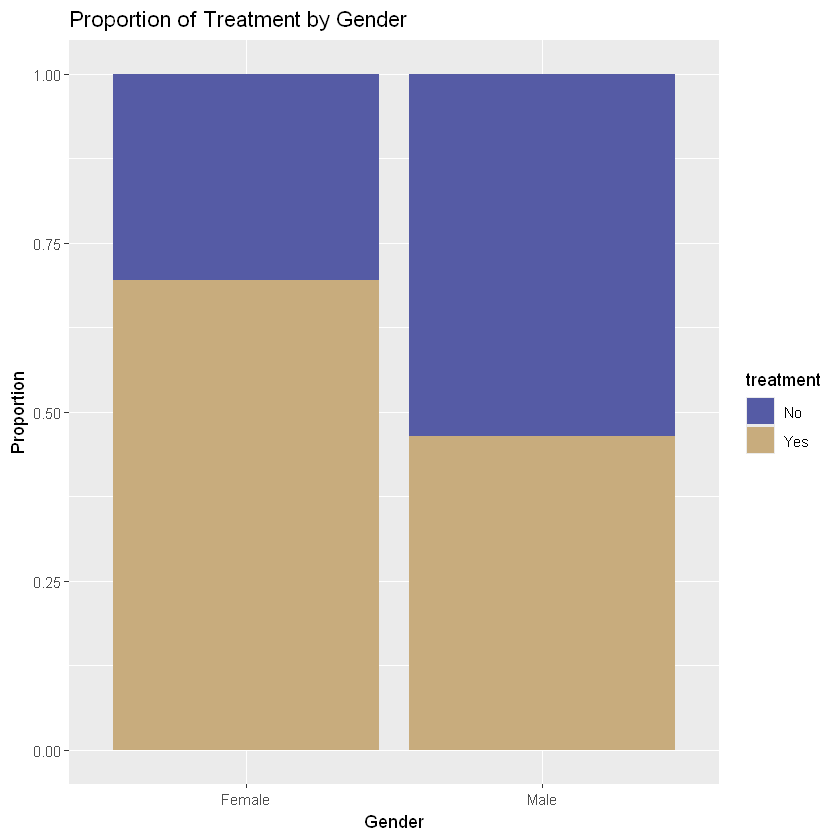

In [11]:
# By Gender
# ggplot(data, aes(x = Gender, fill = treatment)) +
#   geom_bar(position = "fill") +
#   labs(title = "Proportion of Treatment by Gender", x = "Gender", y = "Proportion") +
#   scale_fill_brewer(palette = "Set3")

# Define custom colors using hex codes
custom_colors <- c("#555ba5", "#c8ac7d")  # Replace with desired hex codes

# Create the plot with custom colors
ggplot(data, aes(x = Gender, fill = treatment)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of Treatment by Gender", x = "Gender", y = "Proportion") +
  scale_fill_manual(values = custom_colors)

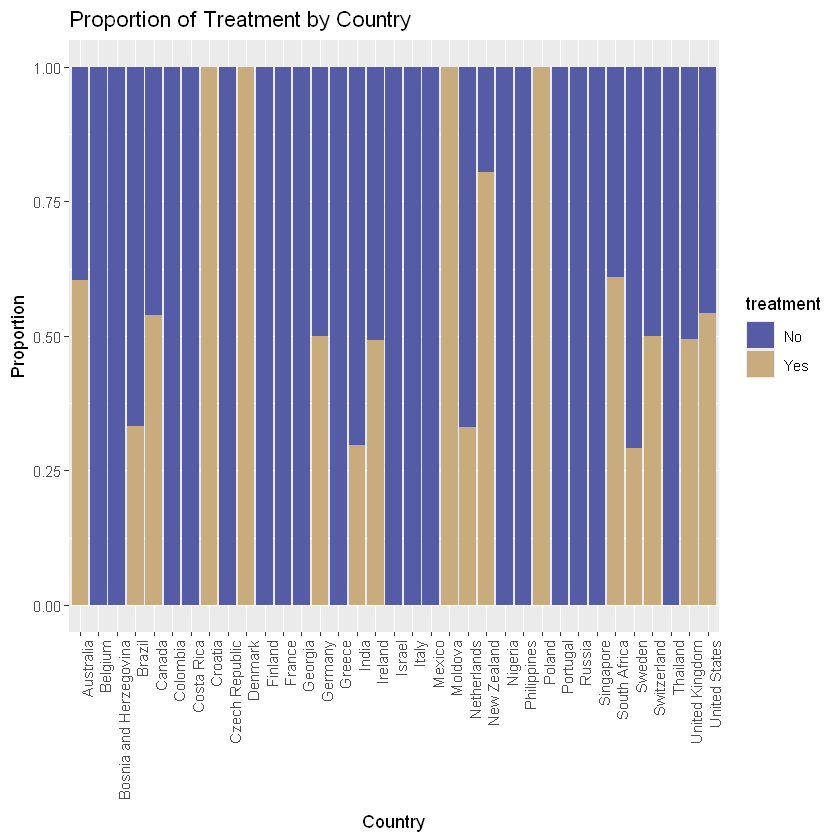

In [12]:
# By Country

# Define custom colors using hex codes
custom_colors <- c("#555ba5", "#c8ac7d")  # Replace with desired hex codes

ggplot(data, aes(x = Country, fill = treatment)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of Treatment by Country", x = "Country", y = "Proportion") +
   scale_fill_manual(values = custom_colors) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

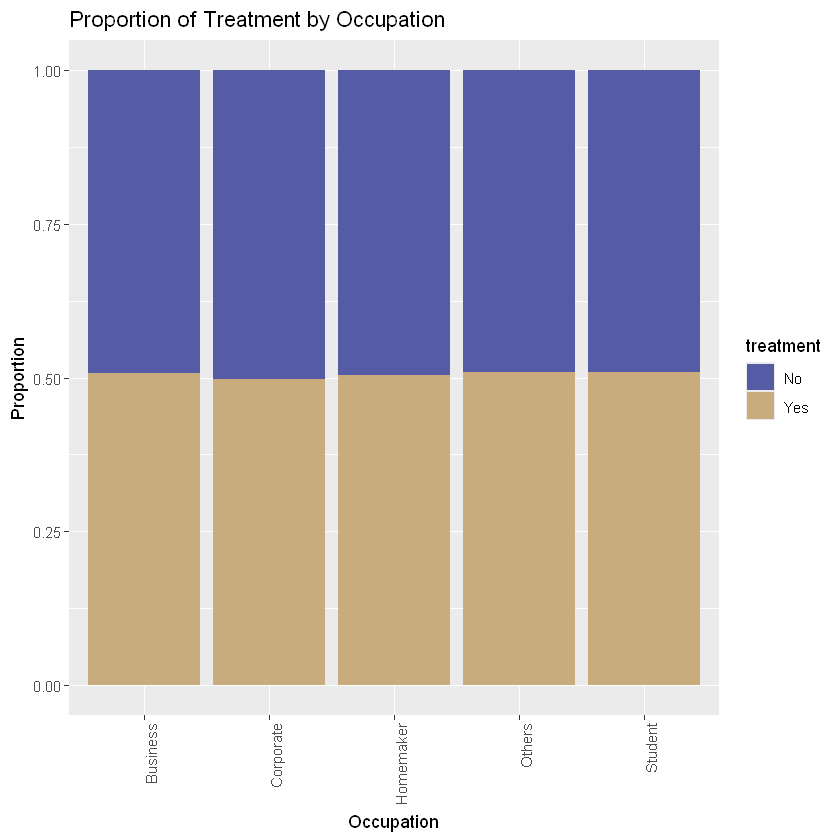

In [13]:
# By Occupation
ggplot(data, aes(x = Occupation, fill = treatment)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of Treatment by Occupation", x = "Occupation", y = "Proportion") +
   scale_fill_manual(values = custom_colors) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

### Trends in Treatment and Stress Over Time

In [18]:
# Trends in Treatment Over Time
treatment_trends <- data %>%
  group_by(Timestamp) %>%
  summarize(treatment_rate = mean(diagnosed, na.rm = TRUE))

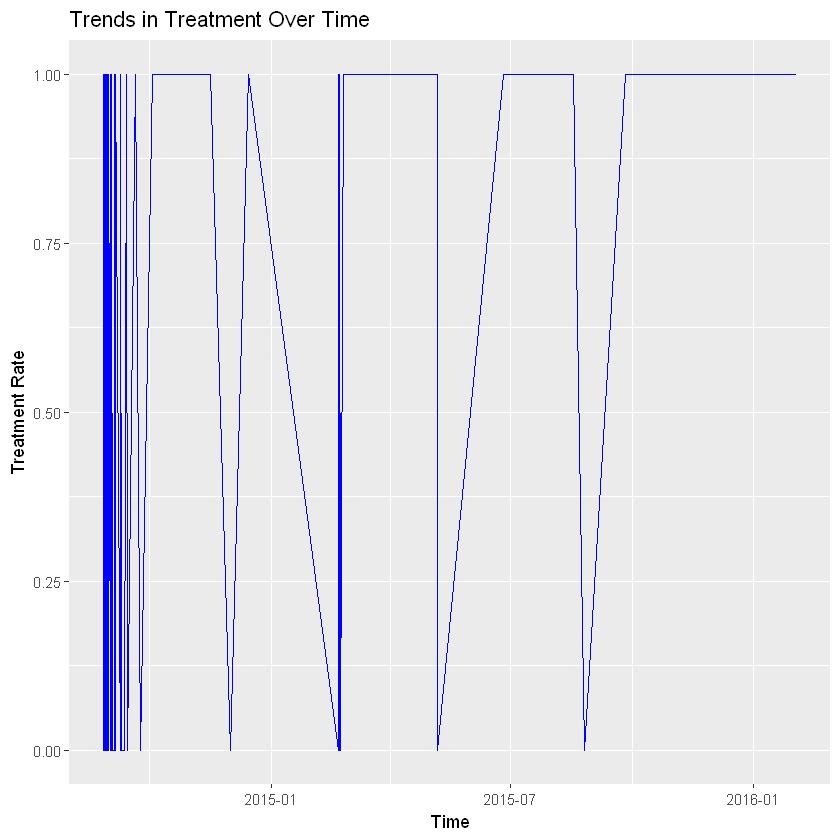

In [19]:
ggplot(treatment_trends, aes(x = Timestamp, y = treatment_rate)) +
  geom_line(color = "blue") +
  labs(title = "Trends in Treatment Over Time", x = "Time", y = "Treatment Rate")

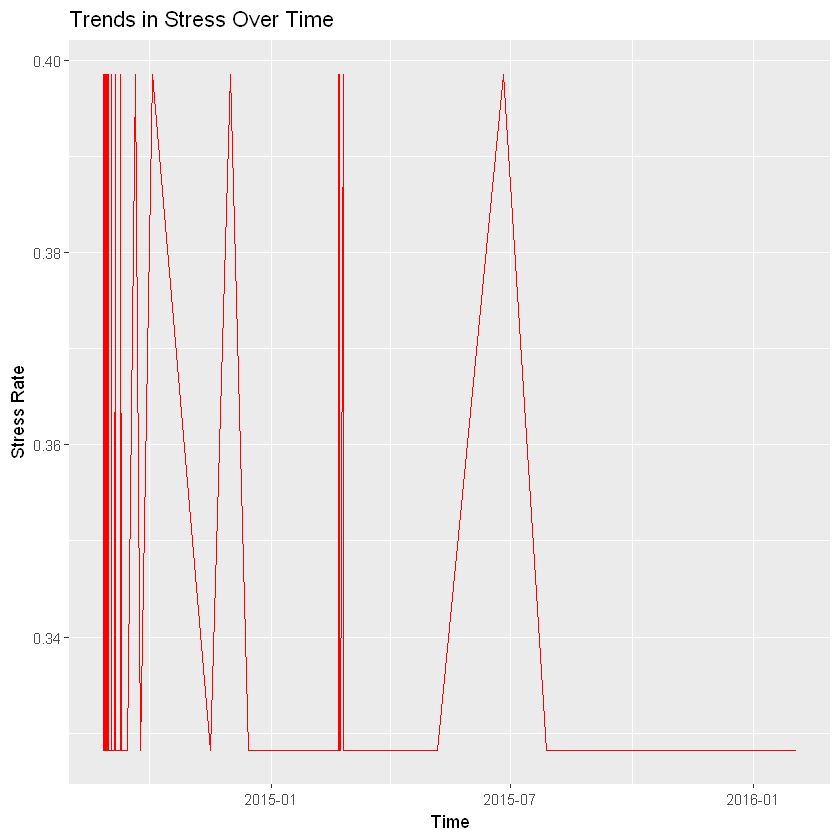

In [20]:
# Trends in Stress Over Time
stress_trends <- data %>%
  group_by(Timestamp) %>%
  summarize(stress_rate = mean(as.numeric(Growing_Stress == "Yes"), na.rm = TRUE))

ggplot(stress_trends, aes(x = Timestamp, y = stress_rate)) +
  geom_line(color = "red") +
  labs(title = "Trends in Stress Over Time", x = "Time", y = "Stress Rate")

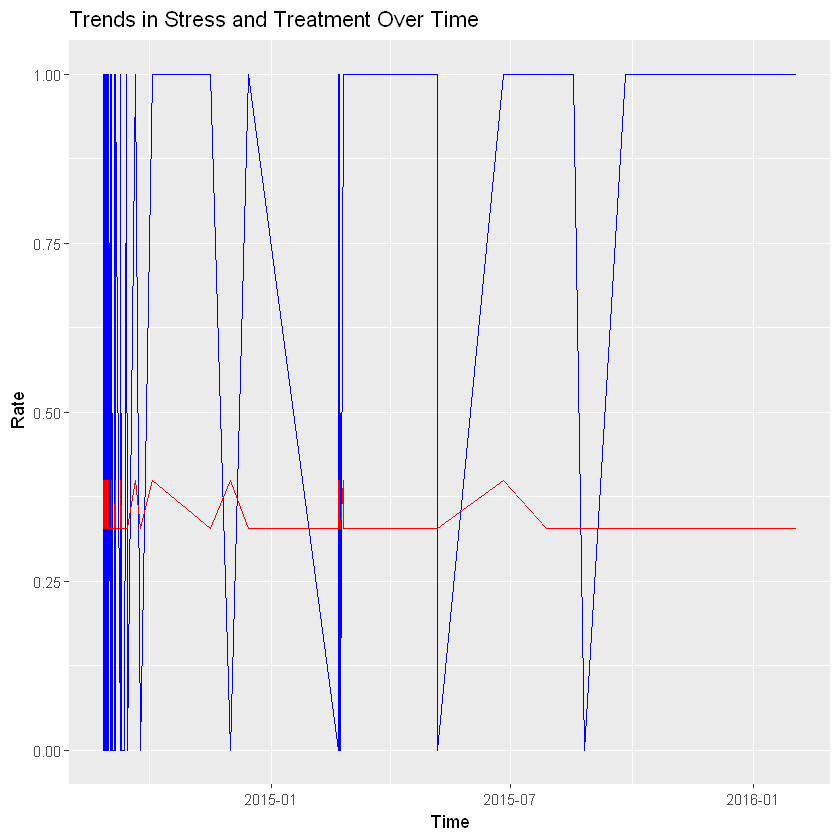

In [21]:
ggplot() +
  geom_line(data = treatment_trends, aes(x = Timestamp, y = treatment_rate), color = "blue") +
  geom_line(data = stress_trends, aes(x = Timestamp, y = stress_rate), color = "red") +
  labs(title = "Trends in Stress and Treatment Over Time", x = "Time", y = " Rate")

### Step 4: Statistical Analysis

#### Chi-Square Test for Categorical Associations

In [22]:
# Chi-Square Test for Gender and Treatment
chisq_gender <- chisq.test(table(data$Gender, data$treatment))
print(chisq_gender)


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(data$Gender, data$treatment)
X-squared = 9179.5, df = 1, p-value < 2.2e-16



In [23]:
# Chi-Square Test for Family History and Treatment
chisq_family <- chisq.test(table(data$family_history, data$treatment))
print(chisq_family)



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(data$family_history, data$treatment)
X-squared = 39330, df = 1, p-value < 2.2e-16



#### Time Series Decomposition

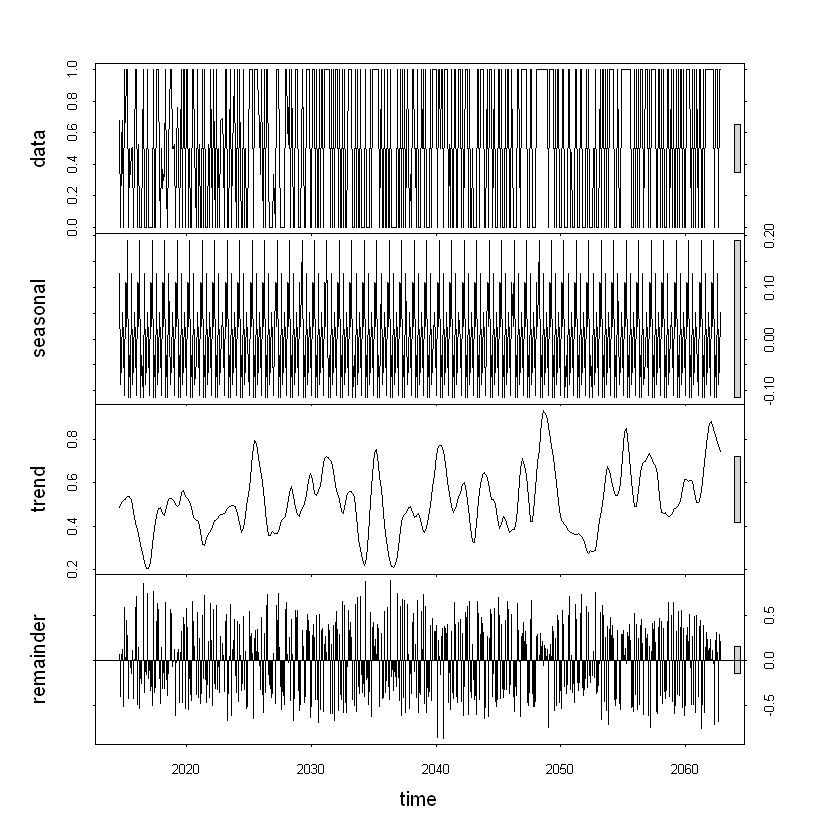

In [24]:
# Time Series Object for Treatment
ts_treatment <- ts(treatment_trends$treatment_rate, 
                   start = c(year(min(data$Timestamp)), month(min(data$Timestamp))), 
                   frequency = 12)

# Decompose the Time Series
decomp <- stl(ts_treatment, s.window = "periodic")
plot(decomp)


Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.


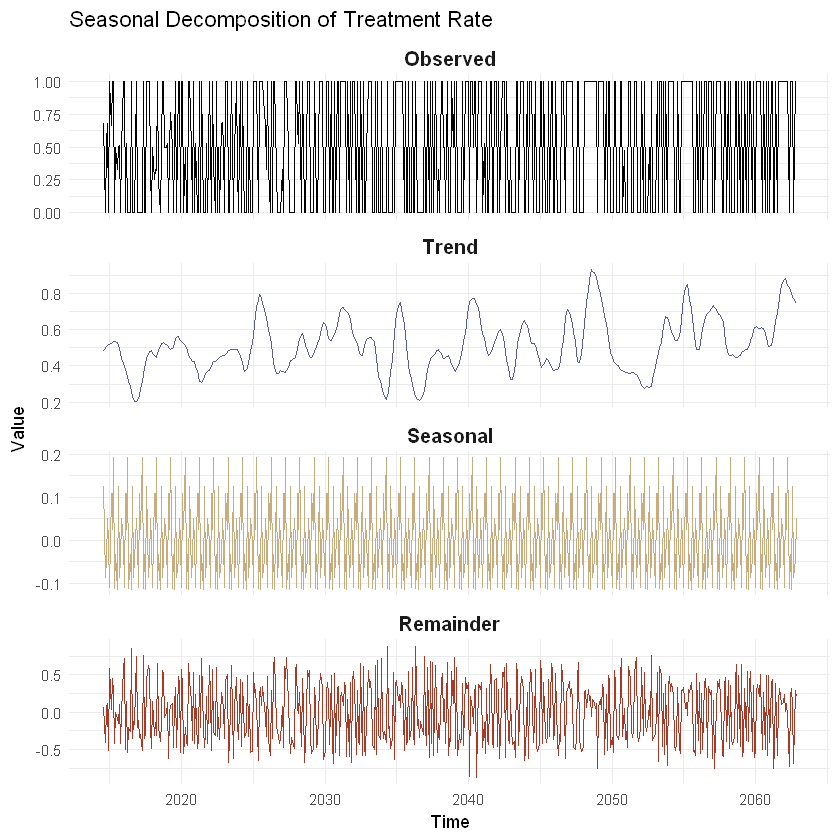

In [30]:
library(ggplot2)
library(forecast)

# Time Series Object for Treatment
ts_treatment <- ts(treatment_trends$treatment_rate, 
                   start = c(year(min(data$Timestamp)), month(min(data$Timestamp))), 
                   frequency = 12)

# Decompose the Time Series
decomp <- stl(ts_treatment, s.window = "periodic")

# Convert the decomposition to a data frame for ggplot
decomp_df <- data.frame(
  Time = time(ts_treatment),
  Observed = ts_treatment,
  Trend = decomp$time.series[, "trend"],
  Seasonal = decomp$time.series[, "seasonal"],
  Remainder = decomp$time.series[, "remainder"]
)

# Convert to long format for ggplot
decomp_long <- reshape2::melt(decomp_df, id.vars = "Time", variable.name = "Component", value.name = "Value")

# Plot using ggplot2
ggplot(decomp_long, aes(x = Time, y = Value, color = Component)) +
  geom_line(size = 0.55) +
  facet_wrap(~Component, ncol = 1, scales = "free_y") +
  scale_color_manual(values = c("Observed" = "black", "Trend" = "#555ba5", 
                                "Seasonal" = "#c8ac7d", "Remainder" = "#a93925")) +
  labs(
    title = "Seasonal Decomposition of Treatment Rate",
    x = "Time",
    y = "Value"
  ) +
  theme_minimal() +
  theme(
    strip.text = element_text(size = 12, face = "bold"),
    legend.position = "none" # Remove legend for clarity
  )


#### Heatmap for Correlations

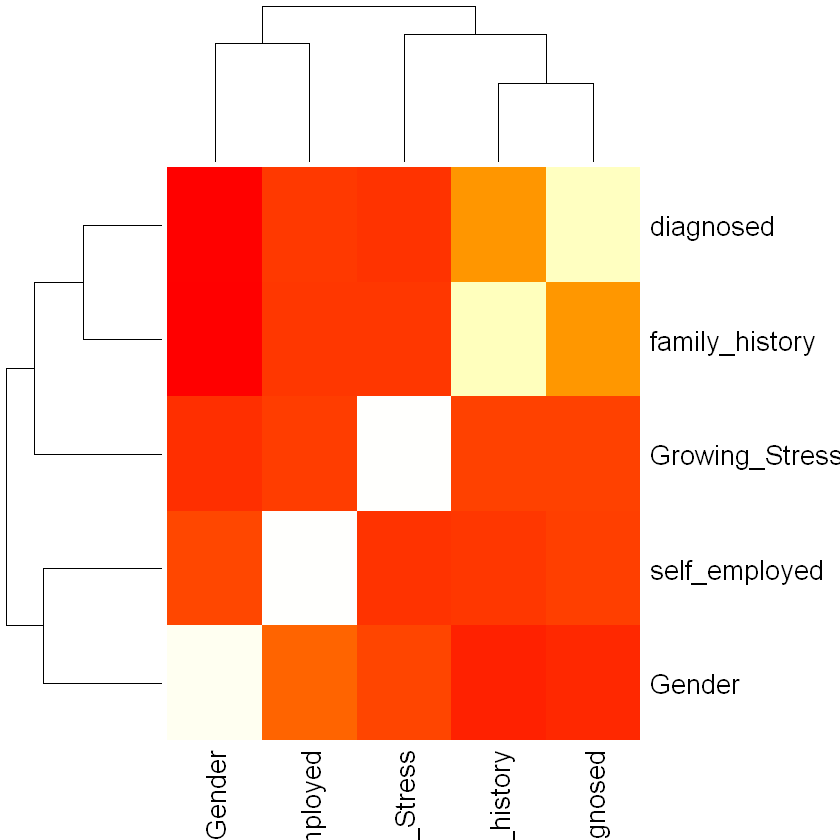

In [31]:
library(reshape2)
cor_data <- data %>%
  select(diagnosed, Gender, family_history, self_employed, Growing_Stress) %>%
  mutate(across(everything(), ~as.numeric(as.factor(.)))) # Convert to numeric for correlation

cor_matrix <- cor(cor_data, use = "complete.obs")
heatmap(cor_matrix, col = heat.colors(256), scale = "row", margins = c(5, 10))


#### Proportion of Diagnosed by Occupation

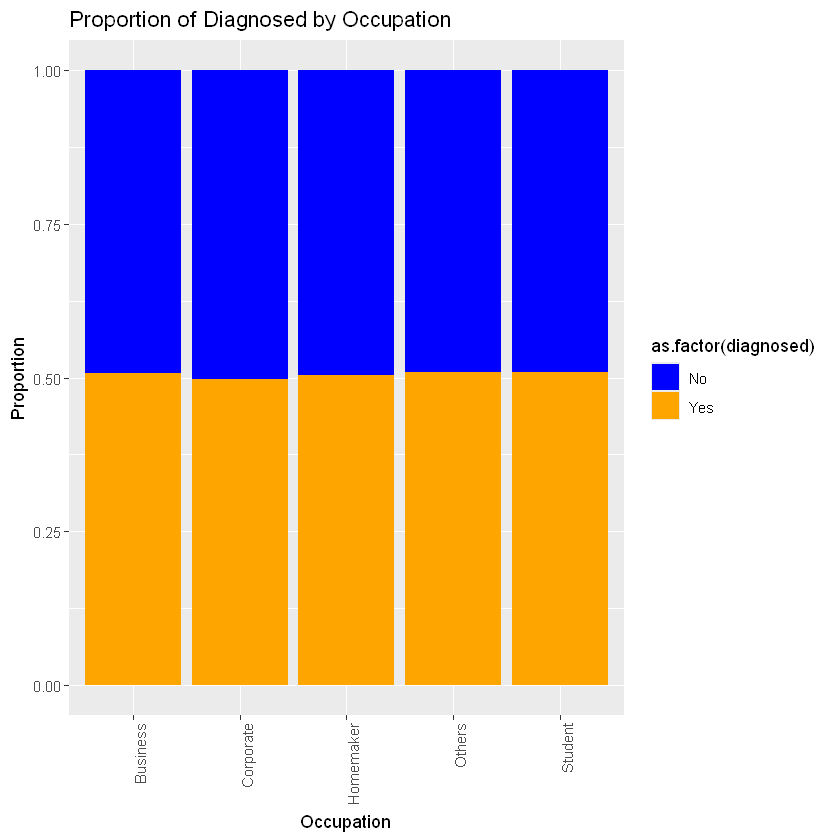

In [23]:
ggplot(data, aes(x = Occupation, fill = as.factor(diagnosed))) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of Diagnosed by Occupation", 
       x = "Occupation", y = "Proportion") +
  scale_fill_manual(values = c("blue", "orange"), labels = c("No", "Yes")) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


### Step 6: Modeling

#### Logistic Regression for Diagnosed Prediction

In [33]:
library(caret)

# Remove rows with missing values
data_clean <- data %>% drop_na(Gender, Country, Occupation, self_employed, family_history, diagnosed)

# Logistic Regression Model
logit_model <- glm(diagnosed ~ Gender + Country + Occupation + self_employed + family_history, 
                   data = data_clean, family = binomial())

# Summary of the Model
summary(logit_model)

# Predictive Performance
pred <- predict(logit_model, type = "response")

# Ensure the prediction and actual lengths match
confusionMatrix(
  as.factor(ifelse(pred > 0.5, 1, 0)), 
  as.factor(data_clean$diagnosed)
)



Call:
glm(formula = diagnosed ~ Gender + Country + Occupation + self_employed + 
    family_history, family = binomial(), data = data_clean)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    1.642e-01  3.207e-02   5.120 3.06e-07 ***
GenderMale                    -5.689e-01  1.148e-02 -49.552  < 2e-16 ***
CountryBelgium                -1.748e+01  1.362e+02  -0.128 0.897883    
CountryBosnia and Herzegovina -1.868e+01  2.003e+02  -0.093 0.925692    
CountryBrazil                 -9.550e-01  5.465e-02 -17.474  < 2e-16 ***
CountryCanada                 -5.167e-02  3.346e-02  -1.544 0.122518    
CountryColombia               -1.716e+01  2.003e+02  -0.086 0.931732    
CountryCosta Rica             -1.716e+01  2.003e+02  -0.086 0.931732    
CountryCroatia                 1.768e+01  2.003e+02   0.088 0.929664    
CountryCzech Republic         -1.868e+01  2.003e+02  -0.093 0.925692    
CountryDenmark                 1.616e+01

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 112942  58644
         1  29476  86100
                                          
               Accuracy : 0.6931          
                 95% CI : (0.6914, 0.6948)
    No Information Rate : 0.504           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3872          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7930          
            Specificity : 0.5948          
         Pos Pred Value : 0.6582          
         Neg Pred Value : 0.7450          
             Prevalence : 0.4960          
         Detection Rate : 0.3933          
   Detection Prevalence : 0.5975          
      Balanced Accuracy : 0.6939          
                                          
       'Positive' Class : 0               
            

#### 1. Coefficient Plot
Visualizing the coefficients and their confidence intervals helps interpret the impact of each predictor on the likelihood of being diagnosed.

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

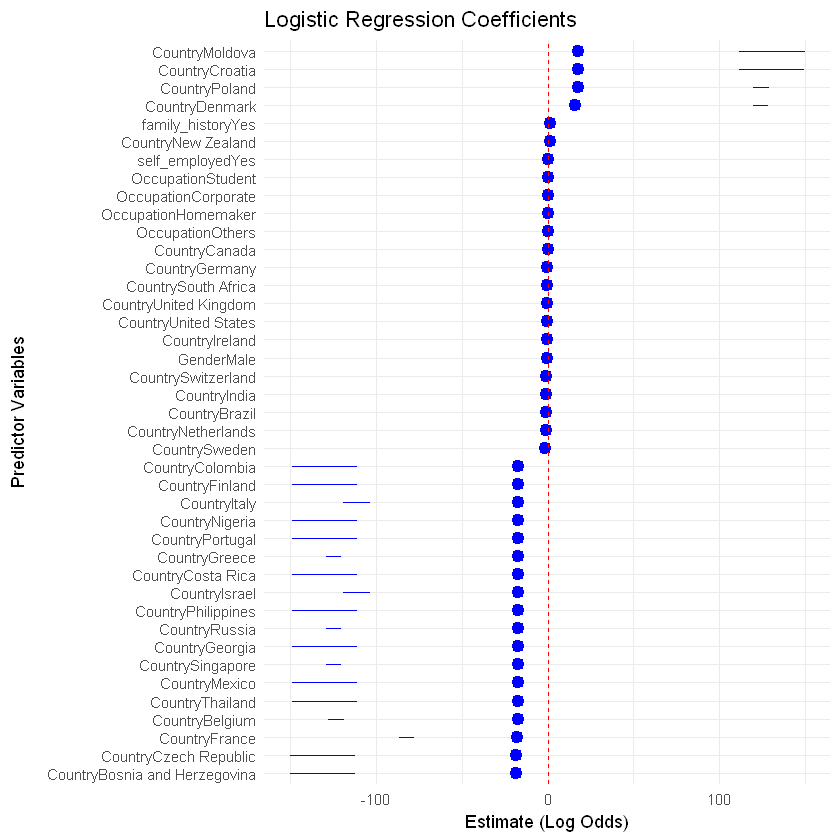

In [39]:
library(broom)
library(ggplot2)

# Extract coefficients and confidence intervals
coefficients_df <- tidy(logit_model, conf.int = TRUE)

# Filter out the intercept
coefficients_df <- coefficients_df %>% filter(term != "(Intercept)")

# Save calibration_df as a CSV file
write.csv(coefficients_df, file = "coefficients_df.csv", row.names = FALSE)

# Coefficient plot
ggplot(coefficients_df, aes(x = reorder(term, estimate), y = estimate, ymin = conf.low, ymax = conf.high)) +
  geom_pointrange(color = "blue", size = 0.7) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  coord_flip() +
  labs(
    title = "Logistic Regression Coefficients",
    x = "Predictor Variables",
    y = "Estimate (Log Odds)"
  ) +
  theme_minimal()


#### 2. ROC Curve
Visualize the trade-off between sensitivity and specificity.

Warning message:
"package 'pROC' was built under R version 4.4.2"
Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



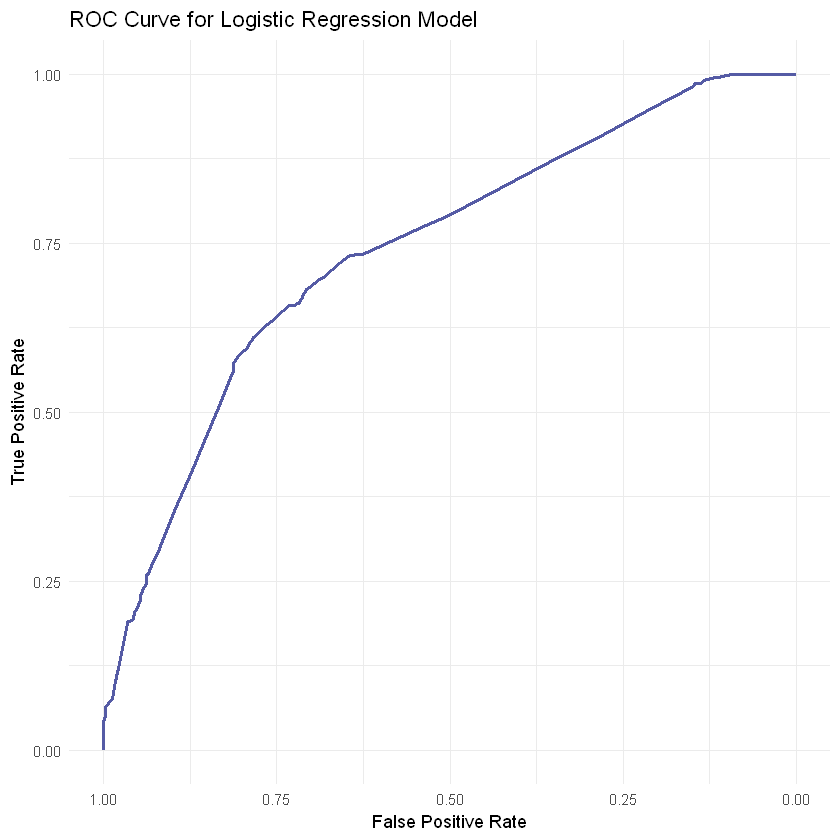

In [34]:
library(pROC)

# Compute ROC curve
roc_curve <- roc(data_clean$diagnosed, pred)

# Plot ROC curve
ggroc(roc_curve, color = "#555ba5", size = 1) +
  labs(
    title = "ROC Curve for Logistic Regression Model",
    x = "False Positive Rate",
    y = "True Positive Rate"
  ) +
  theme_minimal()


#### 3. Confusion Matrix Heatmap
Plot the confusion matrix as a heatmap for a clear view of the model's performance

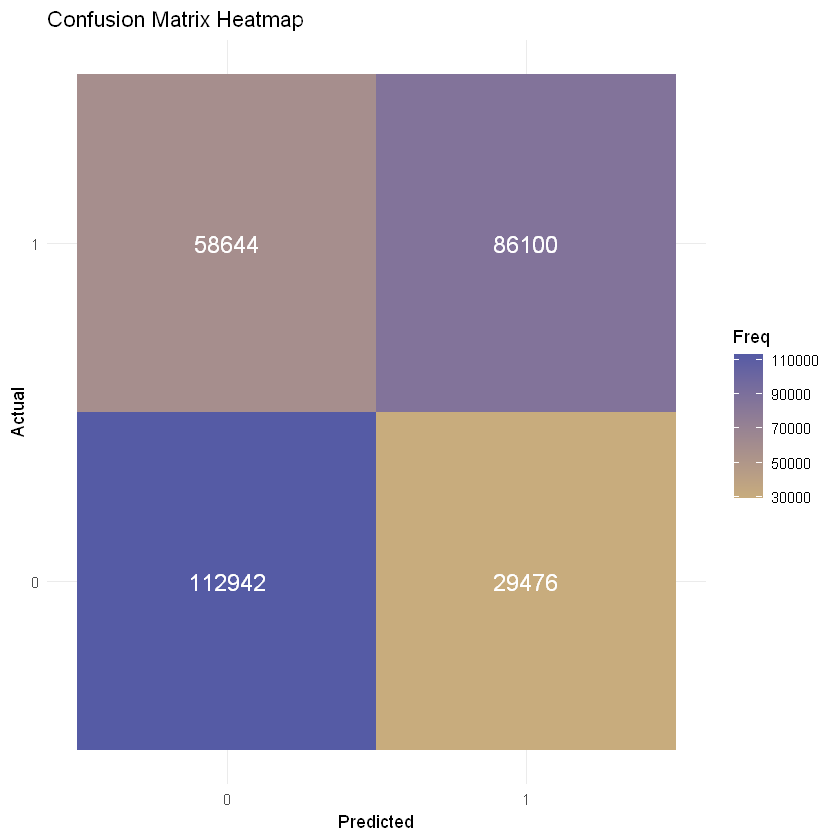

In [38]:
# Generate confusion matrix
conf_matrix <- confusionMatrix(as.factor(ifelse(pred > 0.5, 1, 0)), as.factor(data_clean$diagnosed))

# Convert confusion matrix to a data frame
conf_matrix_df <- as.data.frame(as.table(conf_matrix$table))

# Plot confusion matrix as heatmap
ggplot(conf_matrix_df, aes(x = Prediction, y = Reference, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), color = "white", size = 5) +
  scale_fill_gradient(low = "#c8ac7d", high = "#555ba5") +
  labs(
    title = "Confusion Matrix Heatmap",
    x = "Predicted",
    y = "Actual"
  ) +
  theme_minimal()


#### 4. Calibration Plot
Evaluate how well the predicted probabilities match observed outcomes.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Failed to fit group -1.
Caused by error in `predLoess()`:
! workspace required (123695821243) is too large probably because of setting 'se = TRUE'."


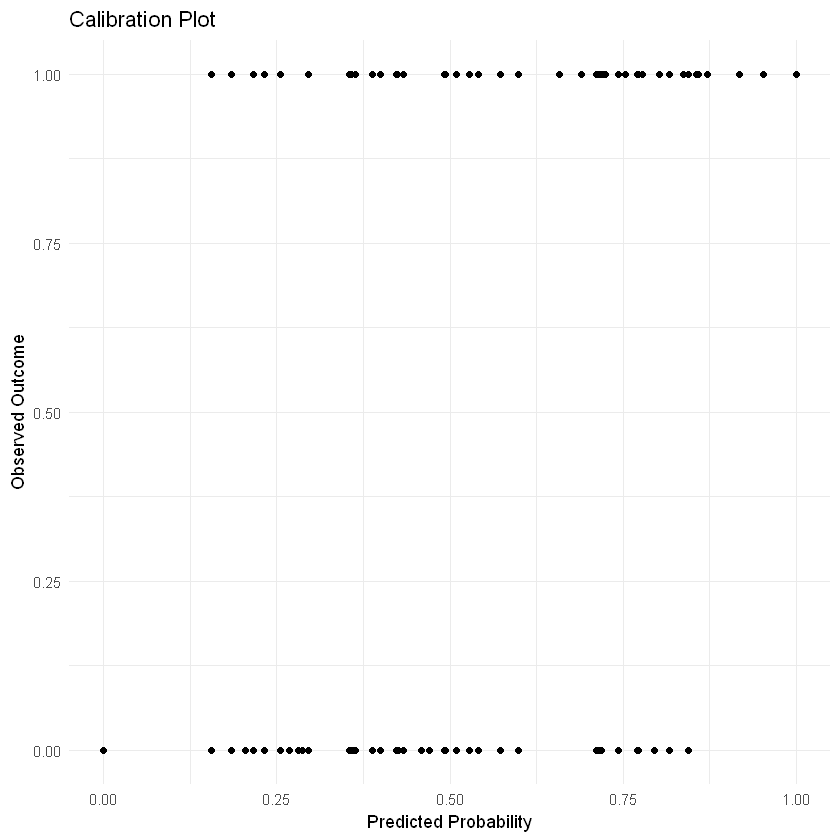

In [29]:
# Create a data frame with observed and predicted values
calibration_df <- data.frame(
  Observed = data_clean$diagnosed,
  Predicted = pred
)

# Calibration plot
ggplot(calibration_df, aes(x = Predicted, y = Observed)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "loess", color = "blue", se = TRUE) +
  labs(
    title = "Calibration Plot",
    x = "Predicted Probability",
    y = "Observed Outcome"
  ) +
  theme_minimal()


In [31]:
# Save calibration_df as a CSV file
write.csv(calibration_df, file = "calibration_df.csv", row.names = FALSE)

#### 5. Predicted Probabilities by Predictor Group
Visualize how predicted probabilities vary by key predictors.

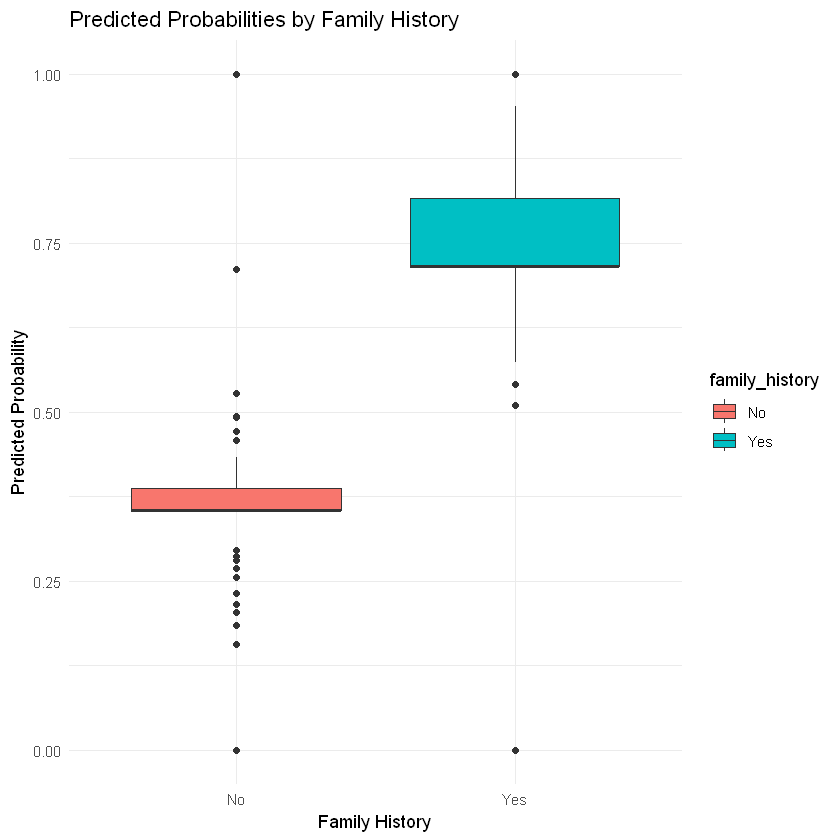

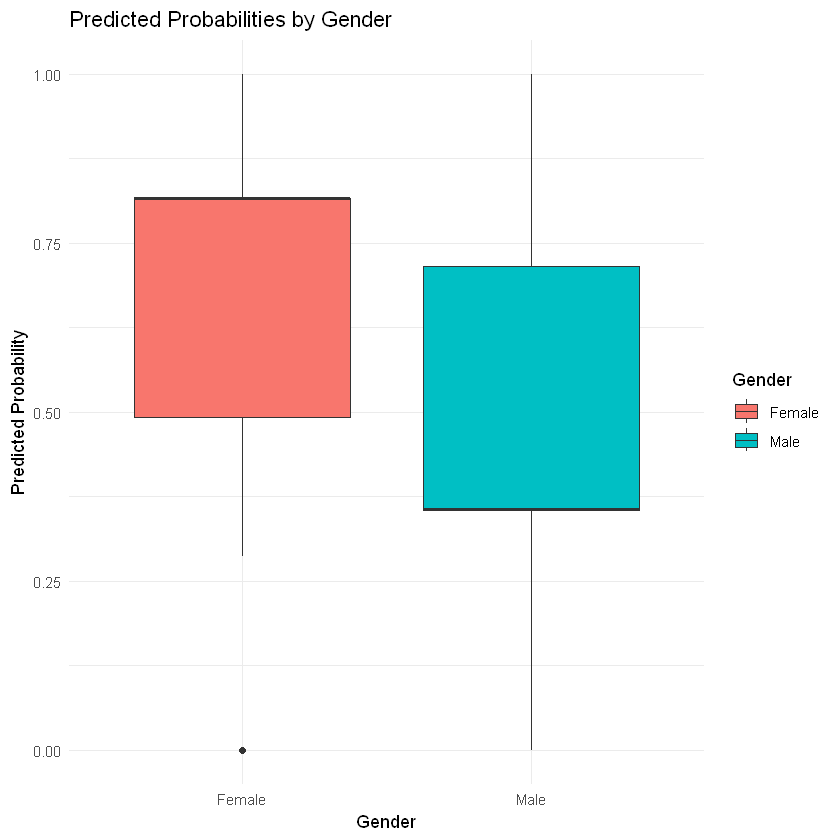

In [30]:
# Add predicted probabilities to the dataset
data_clean <- data_clean %>% mutate(predicted_prob = pred)

# Predicted probabilities by Family History
ggplot(data_clean, aes(x = family_history, y = predicted_prob, fill = family_history)) +
  geom_boxplot() +
  labs(
    title = "Predicted Probabilities by Family History",
    x = "Family History",
    y = "Predicted Probability"
  ) +
  theme_minimal()

# Predicted probabilities by Gender
ggplot(data_clean, aes(x = Gender, y = predicted_prob, fill = Gender)) +
  geom_boxplot() +
  labs(
    title = "Predicted Probabilities by Gender",
    x = "Gender",
    y = "Predicted Probability"
  ) +
  theme_minimal()


#### 6. Variable Importance Plot
Although logistic regression doesn’t inherently rank feature importance, you can use the absolute magnitude of coefficients as a proxy.

In [37]:
# Rank predictors by absolute coefficient magnitude
coefficients_df <- coefficients_df %>% mutate(abs_estimate = abs(estimate))

# Plot variable importance
ggplot(coefficients_df, aes(x = reorder(term, abs_estimate), y = abs_estimate, fill = term)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(
    title = "Variable Importance Based on Coefficients",
    x = "Predictor Variables",
    y = "Absolute Coefficient Magnitude"
  ) +
  theme_minimal() +
  scale_fill_viridis_d()


ERROR: Error in eval(expr, envir, enclos): object 'coefficients_df' not found


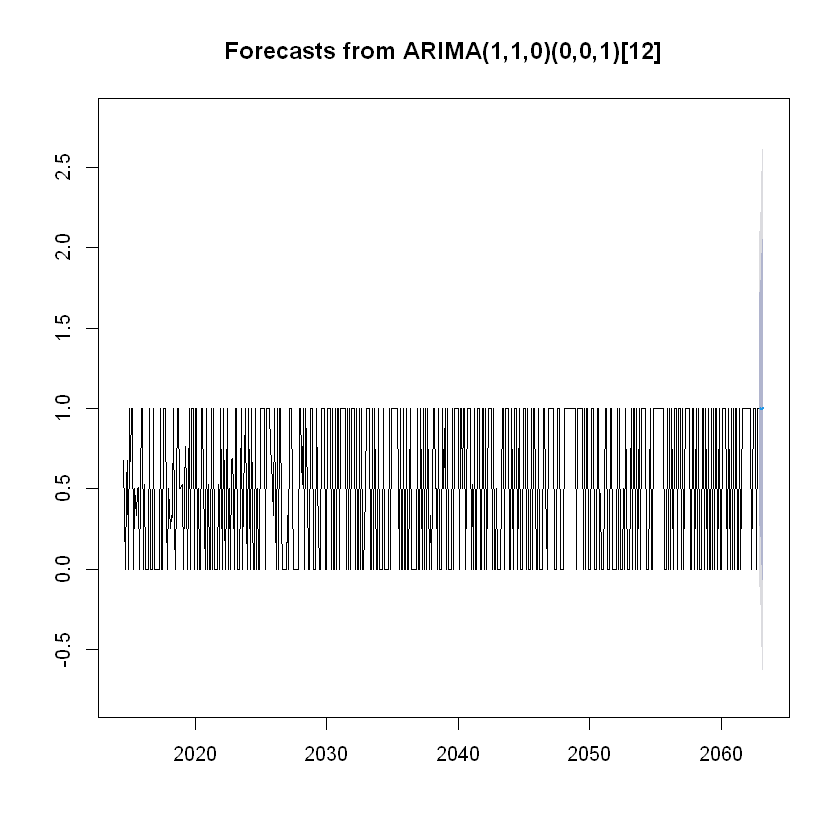

In [39]:
# ARIMA Model for Treatment Trends
fit_arima <- auto.arima(ts_treatment)
forecast_arima <- forecast(fit_arima, h = 5)
plot(forecast_arima)


#### Violin Plot for Days Indoors by Treatment

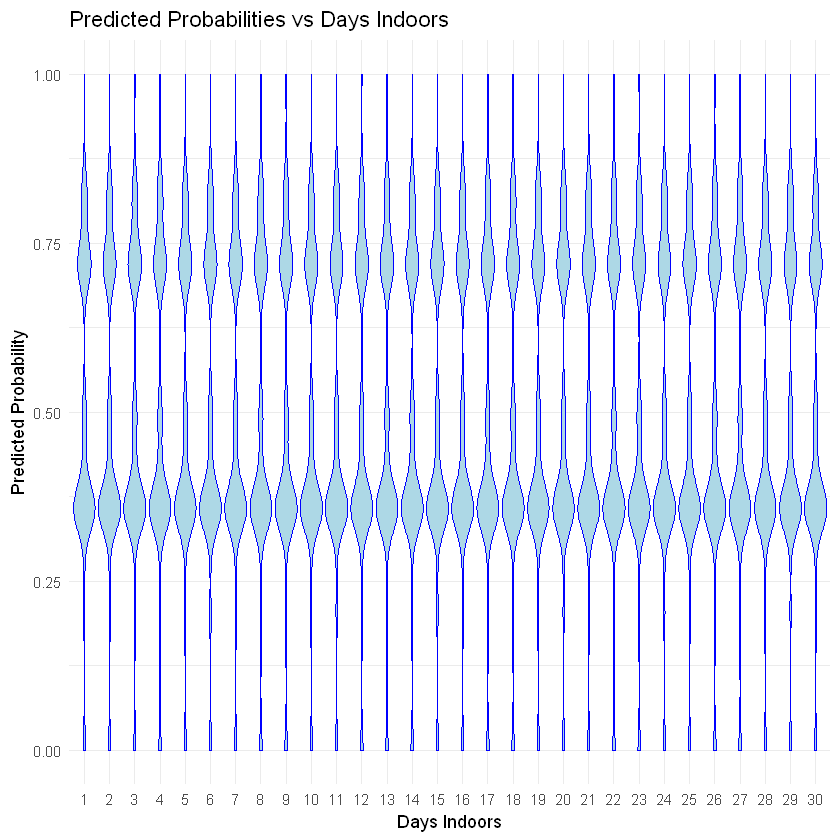

In [36]:
# Ensure column exists or create it
data_clean <- data_clean %>%
  mutate(Days_Indoor = sample(1:30, nrow(data_clean), replace = TRUE))  # Replace with actual logic

# Plot code using Days_Indoor
ggplot(data_clean, aes(x = factor(Days_Indoor), y = pred)) +
  geom_violin(fill = "lightblue", color = "blue") +
  labs(
    title = "Predicted Probabilities vs Days Indoors",
    x = "Days Indoors",
    y = "Predicted Probability"
  ) +
  theme_minimal()


This code creates a random Days_Indoor variable and uses a violin plot to visualize the distribution of the predicted probabilities (pred) across different values of Days_Indoor. The ggplot2 package is used to generate the plot, providing a clean and intuitive representation of how predicted probabilities vary across the Days_Indoor categories.

#### Trends in Work Interest Over Time

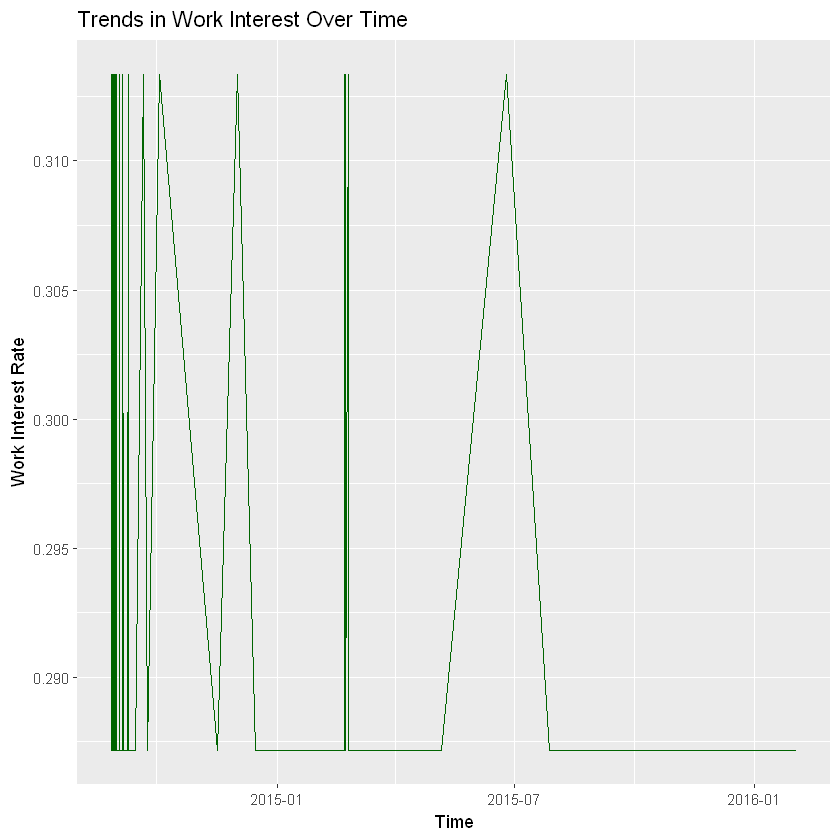

In [38]:
work_interest_trends <- data %>%
  group_by(Timestamp) %>%
  summarize(work_interest_rate = mean(as.numeric(Work_Interest == "Yes"), na.rm = TRUE))

ggplot(work_interest_trends, aes(x = Timestamp, y = work_interest_rate)) +
  geom_line(color = "darkgreen") +
  labs(title = "Trends in Work Interest Over Time", x = "Time", y = "Work Interest Rate")
